Імпорт бібліотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Завантаження даних

In [2]:
def load_data(file_name):
    return pd.read_csv(file_name)

1. Виведіть перші 8 рядків набору даних.

In [3]:
def first_8_rows(data):
    return data.head(8)

2. Вивести останні 8 рядків набору даних.

In [4]:
def last_8_rows(data):
    return data.tail(8)

3. Отримайте імена стовпців набору даних

In [5]:
def column_names(data):
    return data.columns.tolist()

5. Знайдіть кількість унікальних імен у наборі даних

In [6]:
def unique_names_count(data):
    return data['Name'].nunique()

10. Підрахуйте кількість унікальних імен у кожному році

In [7]:
def unique_names_per_year(data):
    return data.groupby('Year')['Name'].nunique()

11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [8]:
def year_with_most_unique_names(data):
    return unique_names_per_year(data).idxmax()

12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
 

In [9]:
def most_popular_name_in_year(data, year):
    year_data = data[data['Year'] == year]
    return year_data.loc[year_data['Count'].idxmax(), 'Name']

13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен 


In [10]:
def year_jacob_most_popular_female(data):
    jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
    return jacob_female.loc[jacob_female['Count'].idxmax(), 'Year'] if not jacob_female.empty else None

14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)


In [11]:
def year_with_most_gender_neutral_names(data):
    gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    gender_neutral = gender_neutral[gender_neutral['Gender'] > 1]
    return gender_neutral.groupby('Year').size().idxmax()

15. Знайдіть загальну кількість народжень за рік

In [12]:
def total_births_per_year(data):
    return data.groupby('Year')['Count'].sum()

16. Знайдіть рік, коли народилося найбільше дітей

In [13]:
def year_with_most_births(data):
    return total_births_per_year(data).idxmax()

17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [14]:
def gender_births_per_year(data):
    return data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

In [15]:
def years_more_female_births(data):
    gender_births = gender_births_per_year(data)
    return (gender_births['F'] > gender_births['M']).sum()

21. Порахуйте, скільки разів хлопчиків називали Barbara

In [16]:
def barbara_count_male(data):
    return data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()

22. Підрахуйте скільки років проводилось спостереження

In [17]:
def observation_years(data):
    return data['Year'].nunique()

23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)

In [18]:
def most_popular_gender_neutral_names(data):
    gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    gender_neutral = gender_neutral[gender_neutral['Gender'] > 1]
    consistent_names = gender_neutral['Name'].value_counts() == data['Year'].nunique()
    return consistent_names[consistent_names].index.tolist()

24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів ) 

In [19]:
def most_popular_among_unpopular(data):
    name_counts = data.groupby('Name')['Count'].sum()
    least_popular_names = name_counts[name_counts == name_counts.min()].index
    return data[data['Name'].isin(least_popular_names)].iloc[0]['Name']


26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.

In [20]:
def plot_name_distributions(data):
    john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
    mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(john_female.index, john_female.values, label='John (Female)', linestyle='--', color='blue')
    plt.plot(mary_male.index, mary_male.values, label='Mary (Male)', linestyle=':', color='green')

    plt.title('Розподіл імен John (жін.) та Mary (чол.) по роках')
    plt.xlabel('Рік')
    plt.ylabel('Кількість')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig('name_distributions.png')
    plt.show()

Виклики функцій

Перші 8 рядків:
    Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
Останні 8 рядків:
               Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5
Імена стовпців:
 ['Id', 'Name', 'Year', 'Gender', 'Count']
Кількість унікальних імен: 93889
Кількість унікальних імен у кожному році:
 Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
       

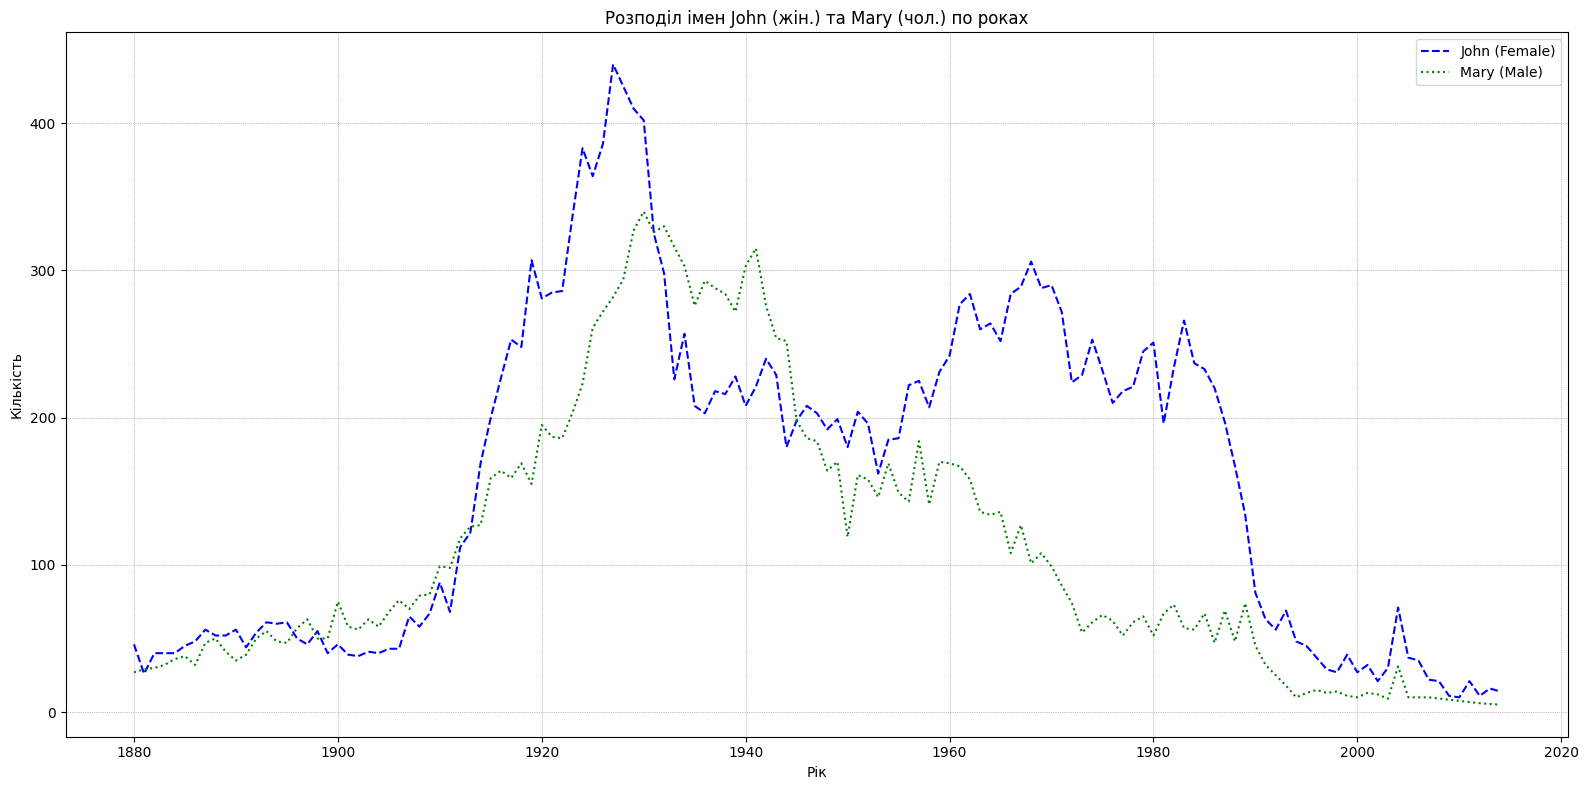

In [21]:
file_name = "NationalNames.csv"
data = load_data(file_name)

print("Перші 8 рядків:\n", first_8_rows(data))
print("Останні 8 рядків:\n", last_8_rows(data))
print("Імена стовпців:\n", column_names(data))
print("Кількість унікальних імен:", unique_names_count(data))
print("Кількість унікальних імен у кожному році:\n", unique_names_per_year(data))
print("Рік із найбільшою кількістю унікальних імен:", year_with_most_unique_names(data))
most_unique_year = year_with_most_unique_names(data)
print("Найпопулярніше ім'я в році з найбільшою кількістю унікальних імен:", most_popular_name_in_year(data, most_unique_year))
print("Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих:", year_jacob_most_popular_female(data))
print("Рік із найбільшою кількістю гендерно-нейтральних імен:", year_with_most_gender_neutral_names(data))
print("Загальна кількість народжень за рік:\n", total_births_per_year(data))
print("Рік із найбільшою кількістю народжень:", year_with_most_births(data))
print("Кількість дівчаток та хлопчиків кожного року:\n", gender_births_per_year(data))
print("Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків:", years_more_female_births(data))
print("Кількість разів хлопчиків називали Barbara:", barbara_count_male(data))
print("Кількість років спостереження:", observation_years(data))
print("Найпопулярніші гендерно-нейтральні імена:", most_popular_gender_neutral_names(data))
print("Найпопулярніше серед непопулярних імен:", most_popular_among_unpopular(data))

plot_name_distributions(data)
